<a href="https://colab.research.google.com/github/sami10644/SocialROI-Facebook-Marketing-Campaign-Analyzer/blob/main/custom_FB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2,style='darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#import .csv file
data = pd.read_csv('1.-Report-Targeting-new.csv')

# 1. Data Exploration & Cleaning

### 1. Have a first look at data

In [ ]:
data.head()

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions,Reporting starts,Reporting ends
1,T5 - Customers Man,BF Man,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574,01/11/2022,30/11/2022
2,T5 - Customers Man,BF Man Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839,01/11/2022,30/11/2022
3,EU - Interests Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277,01/11/2022,30/11/2022
4,T5 - Customers Woman,BF Woman Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322,01/11/2022,30/11/2022
5,T5 - Customers Woman,BF Woman,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119,01/11/2022,30/11/2022


In [ ]:
#deleting the first row as we don't need that one for analysis

In [ ]:
#axis = 0 # to do anything in row
#axis = 1 # to do anything in column

In [ ]:
data.drop(0,inplace = True,axis = 0 )

In [ ]:
data.shape

(134, 15)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.drop(['Reporting ends','Reporting starts'],axis=1, inplace = True)

In [ ]:
data.drop(data.loc[data["Impressions"] == 0].index,inplace = True)

In [ ]:
data

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
1,T5 - Customers Man,BF Man,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574
2,T5 - Customers Man,BF Man Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839
3,EU - Interests Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277
4,T5 - Customers Woman,BF Woman Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322
5,T5 - Customers Woman,BF Woman,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119
6,US APAC - Interests Man,BF Man 50%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146
7,ALL - Customers Man,BF Man,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,22.0,0.013447,4.467071,814.76,1.617340,37.034545,4.980135,2646,163602
8,T5 EU - LAL Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,12.0,0.005401,1.604316,806.78,1.816889,67.231667,3.630987,4037,222193
9,ALL - Customers Man,BF Man Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,21.0,0.018329,4.889595,752.41,1.481152,35.829048,6.567080,1697,114573
10,T5 EU - Interests Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,8.0,0.002915,1.467357,747.71,1.822846,93.463750,2.724831,5002,274406


In [ ]:
data['Ad name'].value_counts()

BF Man 40%                       7
BF Man Video 40%                 7
BF Woman 40%                     5
BF Woman Video 40%               5
BF Man 50%                       4
BF Man Video 50%                 4
BF Man                           2
BF Man Video                     2
BF Woman Video                   2
BF Woman                         2
BF Man 40% Collection            2
BF Woman Video 50%               2
BF Woman 50%                     2
BF Man Video 40% Collection      2
BF Woman 40% Collection          1
BF Woman Video 40% Collection    1
Name: Ad name, dtype: int64

In [ ]:
data['Ad name'].value_counts(ascending = True)

BF Woman 40% Collection          1
BF Woman Video 40% Collection    1
BF Man                           2
BF Man Video                     2
BF Woman Video                   2
BF Woman                         2
BF Man 40% Collection            2
BF Woman Video 50%               2
BF Woman 50%                     2
BF Man Video 40% Collection      2
BF Man 50%                       4
BF Man Video 50%                 4
BF Woman 40%                     5
BF Woman Video 40%               5
BF Man 40%                       7
BF Man Video 40%                 7
Name: Ad name, dtype: int64

### 2. Drop Columns that are extra

In [ ]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['index'],axis=1, inplace = True)

In [ ]:
#look at the data again
data.head(20)

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
0,T5 - Customers Man,BF Man,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574
1,T5 - Customers Man,BF Man Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839
2,EU - Interests Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277
3,T5 - Customers Woman,BF Woman Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322
4,T5 - Customers Woman,BF Woman,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119
5,US APAC - Interests Man,BF Man 50%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146
6,ALL - Customers Man,BF Man,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,22.0,0.013447,4.467071,814.76,1.617340,37.034545,4.980135,2646,163602
7,T5 EU - LAL Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,12.0,0.005401,1.604316,806.78,1.816889,67.231667,3.630987,4037,222193
8,ALL - Customers Man,BF Man Video,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,21.0,0.018329,4.889595,752.41,1.481152,35.829048,6.567080,1697,114573
9,T5 EU - Interests Man,BF Man 40%,Wwwant! - Private Black Friday 22 - Conversions,Website purchases,8.0,0.002915,1.467357,747.71,1.822846,93.463750,2.724831,5002,274406


In [ ]:
#data["Campaign name"] = data["Campaign name"].str.replace('[\$\,]', '').astype(str)
# Wwwant! -

In [ ]:
# Wwwant
data["Campaign name"] = data["Campaign name"].str.replace('Wwwant', '').astype(str)

In [ ]:
data["Campaign name"] = data["Campaign name"].str.replace('[\!\-]', '').astype(str)

In [ ]:
data

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
1,T5 - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574
2,T5 - Customers Man,BF Man Video,Private Black Friday 22 Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839
3,EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277
4,T5 - Customers Woman,BF Woman Video,Private Black Friday 22 Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322
5,T5 - Customers Woman,BF Woman,Private Black Friday 22 Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119
6,US APAC - Interests Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146
7,ALL - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,22.0,0.013447,4.467071,814.76,1.617340,37.034545,4.980135,2646,163602
8,T5 EU - LAL Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,12.0,0.005401,1.604316,806.78,1.816889,67.231667,3.630987,4037,222193
9,ALL - Customers Man,BF Man Video,Private Black Friday 22 Conversions,Website purchases,21.0,0.018329,4.889595,752.41,1.481152,35.829048,6.567080,1697,114573
10,T5 EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,8.0,0.002915,1.467357,747.71,1.822846,93.463750,2.724831,5002,274406


In [ ]:
# data[]

In [ ]:
#check rows and columns in data
data.shape

(50, 13)

#### So, there are 31 rows and 13 columns in the data

### 3. Deal with Null Values

In [ ]:
#let's look if any column has null values
data.isnull().sum()

Ad set name                         0
Ad name                             0
Campaign name                       0
Result Type                         0
Results                             2
Result rate                         2
Frequency                           0
Amount spent (EUR)                  0
CTR (all)                           0
Cost per result                     2
CPM (cost per 1,000 impressions)    0
Clicks (all)                        0
Impressions                         0
dtype: int64

#### From this we can infer that some columns have Null values (basically blank). Let's look at them:
**1. Results:** This happened when there was no conversion (Result).

**2. Result rate, Cost per result:** As both these metrics depend on Result, so these are also blank.

This was bound to happen because not every single day and every ad got a result (conversion). **So it is safe to replace all nulls in Results and Result rate column with 0.**

In [ ]:
#If the frequency is greater than 4 then we can see here few rows

In [ ]:
n = data[data["Frequency"] > 4]
n

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
1,T5 - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574
2,T5 - Customers Man,BF Man Video,Private Black Friday 22 Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839
4,T5 - Customers Woman,BF Woman Video,Private Black Friday 22 Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322
5,T5 - Customers Woman,BF Woman,Private Black Friday 22 Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119
7,ALL - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,22.0,0.013447,4.467071,814.76,1.617340,37.034545,4.980135,2646,163602
9,ALL - Customers Man,BF Man Video,Private Black Friday 22 Conversions,Website purchases,21.0,0.018329,4.889595,752.41,1.481152,35.829048,6.567080,1697,114573
22,All - Customers Woman,BF Woman Video,Private Black Friday 22 Conversions,Website purchases,7.0,0.014337,4.020504,396.97,1.302611,56.710000,8.130466,636,48825


In [ ]:
data["Ad set name"][data["Frequency"] > 4]

1        T5 - Customers Man
2        T5 - Customers Man
4      T5 - Customers Woman
5      T5 - Customers Woman
7       ALL - Customers Man
9       ALL - Customers Man
22    All - Customers Woman
Name: Ad set name, dtype: object

In [ ]:
data.sort_values(by= ['CTR (all)'],ascending= False)

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
11,EU - LAL Man Catalog,BF Man 40% Collection,Private Black Friday 22 Conversions,Website purchases,12.0,0.006267,1.797546,602.24,6.513168,50.186667,3.145037,12472,191489
12,T5 EU - LAL Man Catalog,BF Man 40% Collection,Private Black Friday 22 Conversions,Website purchases,8.0,0.007327,1.909259,586.98,5.069563,73.372500,5.376210,5535,109181
24,EU - LAL Woman Catalog,BF Woman 40% Collection,Private Black Friday 22 Conversions,Website purchases,8.0,0.009571,1.628976,370.34,4.966143,46.292500,4.430646,4151,83586
50,EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,NaN,NaN,1.258690,91.26,4.877106,NaN,5.040597,883,18105
48,EU - LAL Woman Catalog,BF Woman Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,1.0,0.005545,1.434378,92.41,4.730217,92.410000,5.124494,853,18033
46,T5 EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,2.0,0.011822,1.466961,109.03,4.167406,54.515000,6.444996,705,16917
33,US APAC - Visitors Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,3.0,0.033971,2.174052,184.48,3.872721,61.493333,20.890046,342,8831
40,US APAC - LAL Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,1.0,0.006025,1.184823,124.16,3.187323,124.160000,7.480870,529,16597
27,US APAC - Customers Man,BF Man Video 50%,Private Black Friday 22 Conversions,Website purchases,7.0,0.083027,2.722312,291.84,3.000830,41.691429,34.615111,253,8431
6,US APAC - Interests Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146


In [ ]:

n =data.sort_values(by= ['Ad name'])
n[n["CTR (all)"] > 4]

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
11,EU - LAL Man Catalog,BF Man 40% Collection,Private Black Friday 22 Conversions,Website purchases,12.0,0.006267,1.797546,602.24,6.513168,50.186667,3.145037,12472,191489
12,T5 EU - LAL Man Catalog,BF Man 40% Collection,Private Black Friday 22 Conversions,Website purchases,8.0,0.007327,1.909259,586.98,5.069563,73.372500,5.376210,5535,109181
46,T5 EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,2.0,0.011822,1.466961,109.03,4.167406,54.515000,6.444996,705,16917
50,EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,NaN,NaN,1.258690,91.26,4.877106,NaN,5.040597,883,18105
24,EU - LAL Woman Catalog,BF Woman 40% Collection,Private Black Friday 22 Conversions,Website purchases,8.0,0.009571,1.628976,370.34,4.966143,46.292500,4.430646,4151,83586
48,EU - LAL Woman Catalog,BF Woman Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,1.0,0.005545,1.434378,92.41,4.730217,92.410000,5.124494,853,18033


In [ ]:
data["Amount spent (EUR)"].corr(data["CTR (all)"])

-0.03972306221627531

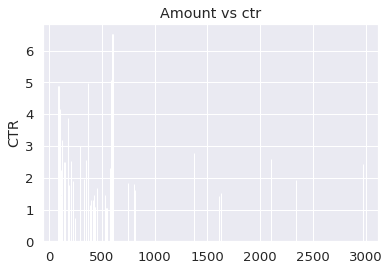

In [ ]:
plt.bar(data["Amount spent (EUR)"],data["CTR (all)"])
plt.ylabel("CTR")
plt.title("Amount vs ctr")
plt.show()

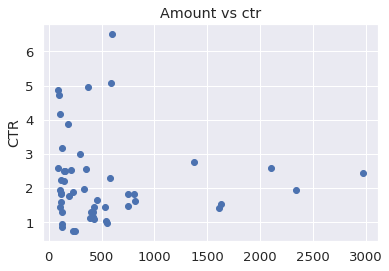

In [ ]:
plt.scatter(data["Amount spent (EUR)"],data["CTR (all)"])
plt.ylabel("CTR")
plt.title("Amount vs ctr")
plt.show()

In [ ]:
data[data["Amount spent (EUR)"] > 2500]

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
1,T5 - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574


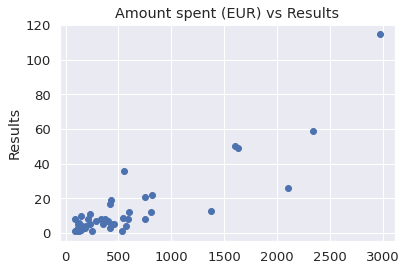

In [ ]:
plt.scatter(data["Amount spent (EUR)"],data["Results"])
plt.ylabel("Results")
plt.title("Amount spent (EUR) vs Results")
plt.show()

In [ ]:
m = data[ data["Amount spent (EUR)"] > 2000 & data["Results"]  < 40 ]
m

TypeError: ignored

In [ ]:
m = data[ data["Results"]  == 26 ]

In [ ]:
m

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions
3,EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277


In [ ]:
#Fill all blanks in Results with 0
data['Results'] = data['Results'].fillna(0)
data['Result rate'] = data['Result rate'].fillna(0)

In [ ]:
#check how many nulls are still there
data.isnull().sum()

Ad set name                         0
Ad name                             0
Campaign name                       0
Result Type                         0
Results                             2
Result rate                         2
Frequency                           0
Amount spent (EUR)                  0
CTR (all)                           0
Cost per result                     2
CPM (cost per 1,000 impressions)    0
Clicks (all)                        0
Impressions                         0
dtype: int64

#### Voila! Results & Result rate column has no nulls now. Let's see what column Results Type is all about.

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ad set name                       50 non-null     object 
 1   Ad name                           50 non-null     object 
 2   Campaign name                     50 non-null     object 
 3   Result Type                       50 non-null     object 
 4   Results                           50 non-null     float64
 5   Result rate                       50 non-null     float64
 6   Frequency                         50 non-null     float64
 7   Amount spent (EUR)                50 non-null     float64
 8   CTR (all)                         50 non-null     float64
 9   Cost per result                   48 non-null     float64
 10  CPM (cost per 1,000 impressions)  50 non-null     float64
 11  Clicks (all)                      50 non-null     int64  
 12  Impression

# 2. Feature Engineering

Make new and better features from using the current available features

### 1. Make Cost per Click column

Notice that our data does not have Cost per click; which is an important KPI.
Let us create that metric using the formula:
**CPC = Cost / Clicks**

In [ ]:
data['CPC'] = data['Amount spent (EUR)']/data['Clicks (all)']

In [ ]:
data.head()

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions,CPC
0,T5 - Customers Man,BF Man,Private Black Friday 22 Conversions,Website purchases,115.0,0.026524,4.870305,2970.02,2.442951,25.826261,6.850088,10592,433574,0.280402
1,T5 - Customers Man,BF Man Video,Private Black Friday 22 Conversions,Website purchases,59.0,0.021389,4.850769,2340.55,1.943162,39.670339,8.485203,5360,275839,0.436670
2,EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,26.0,0.002556,1.902672,2099.02,2.574815,80.731538,2.063371,26193,1017277,0.080137
3,T5 - Customers Woman,BF Woman Video,Private Black Friday 22 Conversions,Website purchases,49.0,0.033036,4.520772,1632.57,1.527083,33.317755,11.006931,2265,148322,0.720781
4,T5 - Customers Woman,BF Woman,Private Black Friday 22 Conversions,Website purchases,50.0,0.032869,4.324511,1606.42,1.414682,32.128400,10.560285,2152,152119,0.746478


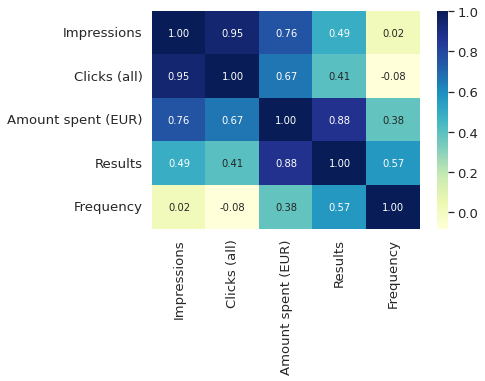

In [ ]:


g=sns.heatmap(data[["Impressions","Clicks (all)","Amount spent (EUR)","Results","Frequency"]].corr(),annot=True ,fmt=".2f", cmap="YlGnBu")

In [ ]:
data["Ad name"].unique()

array(['BF Man', 'BF Man Video', 'BF Man 40%', 'BF Woman Video',
       'BF Woman', 'BF Man 50%', 'BF Man 40% Collection',
       'BF Man Video 50%', 'BF Woman 40%', 'BF Man Video 40%',
       'BF Woman Video 40%', 'BF Woman 40% Collection',
       'BF Woman Video 50%', 'BF Woman 50%',
       'BF Man Video 40% Collection', 'BF Woman Video 40% Collection'],
      dtype=object)

In [ ]:
data["Ad name"]['BF Man']

### 2. We can divide Frequency in buckets

In [ ]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [ ]:
data.head()

,Campaign name,Ad set name,Ad name,Campaign name.1,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)"
0,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Man Gallery,40% Static Models Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,11.0,0.006321,2 to 3,865.44,0.875681,78.676364,4.972764
1,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Man — Extra 20%,Extra 20% Video 2 Men,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,8.0,0.006541,4 to 5,776.32,1.011406,97.040000,6.347410
2,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Woman — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,1.0,0.000732,2 to 3,731.59,1.130092,731.590000,5.354691
3,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Facebook - Visitors Man,40% Static Products Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,13.0,0.015233,More than 5,730.23,1.823231,56.171538,8.556414
4,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Instagram - Brands Woman — Extra 20%,Extra 20% Video 2,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,0.0,0.000000,1 to 2,708.41,0.791542,NaN,5.535405


### 3. Split Ad name into Ad Format and Ad Headline

In [ ]:
data['Ad_name'] = data['Ad name']

In [ ]:
data.head(10)

,Campaign name,Ad set name,Ad name,Campaign name.1,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Ad_name
0,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Man Gallery,40% Static Models Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,11.0,0.006321,2 to 3,865.44,0.875681,78.676364,4.972764,40% Static Models Man
1,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Man — Extra 20%,Extra 20% Video 2 Men,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,8.0,0.006541,4 to 5,776.32,1.011406,97.040000,6.347410,Extra 20% Video 2 Men
2,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Woman — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,1.0,0.000732,2 to 3,731.59,1.130092,731.590000,5.354691,Extra 20% Video
3,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Facebook - Visitors Man,40% Static Products Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,13.0,0.015233,More than 5,730.23,1.823231,56.171538,8.556414,40% Static Products Man
4,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Instagram - Brands Woman — Extra 20%,Extra 20% Video 2,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,0.0,0.000000,1 to 2,708.41,0.791542,NaN,5.535405,Extra 20% Video 2
5,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Database Man — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,7.0,0.008310,More than 5,668.49,1.670347,95.498571,7.936107,Extra 20% Video
6,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Man — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,7.0,0.005153,More than 5,665.63,1.129336,95.090000,4.900392,Extra 20% Video
7,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Man Gallery,40% Static Products Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,2.0,0.001687,2 to 3,661.10,1.652746,330.550000,5.577491,40% Static Products Man
8,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Woman — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,15.0,0.014792,More than 5,627.20,0.577869,41.813333,6.184977,Extra 20% Video
9,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Instagram - Brands Man — Extra 20% Coll...,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,2.0,0.001873,1 to 2,536.47,1.768353,268.235000,5.024727,Extra 20% Video


In [ ]:
#data[['Ad Format','Ad Headline']] = data.Ad_name.str.split("-",expand=True)

In [ ]:
data.head()

,Campaign name,Ad set name,Ad name,Campaign name.1,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Ad_name
0,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Man Gallery,40% Static Models Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,11.0,0.006321,2 to 3,865.44,0.875681,78.676364,4.972764,40% Static Models Man
1,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Man — Extra 20%,Extra 20% Video 2 Men,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,8.0,0.006541,4 to 5,776.32,1.011406,97.040000,6.347410,Extra 20% Video 2 Men
2,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Woman — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,1.0,0.000732,2 to 3,731.59,1.130092,731.590000,5.354691,Extra 20% Video
3,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Facebook - Visitors Man,40% Static Products Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,13.0,0.015233,More than 5,730.23,1.823231,56.171538,8.556414,40% Static Products Man
4,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Instagram - Brands Woman — Extra 20%,Extra 20% Video 2,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,0.0,0.000000,1 to 2,708.41,0.791542,NaN,5.535405,Extra 20% Video 2


In [ ]:
data.drop(['Ad_name'],axis=1, inplace = True)

In [ ]:
data.head()

,Campaign name,Ad set name,Ad name,Campaign name.1,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)"
0,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Man Gallery,40% Static Models Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,11.0,0.006321,2 to 3,865.44,0.875681,78.676364,4.972764
1,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Instagram - Database Man — Extra 20%,Extra 20% Video 2 Men,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,8.0,0.006541,4 to 5,776.32,1.011406,97.040000,6.347410
2,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Facebook - Brands Woman — Extra 20%,Extra 20% Video,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,1.0,0.000732,2 to 3,731.59,1.130092,731.590000,5.354691
3,Wwwant! - Philipp Plein - Conversions Public S...,Top20 - Facebook - Visitors Man,40% Static Products Man,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,13.0,0.015233,More than 5,730.23,1.823231,56.171538,8.556414
4,Wwwant! - Philipp Plein - Conversions Public S...,Top4 - Instagram - Brands Woman — Extra 20%,Extra 20% Video 2,Wwwant! - Philipp Plein - Conversions Public S...,Website purchases,0.0,0.000000,1 to 2,708.41,0.791542,NaN,5.535405


In [ ]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     166 non-null    object 
 1   Ad set name                       166 non-null    object 
 2   Ad name                           166 non-null    object 
 3   Campaign name.1                   166 non-null    object 
 4   Result Type                       166 non-null    object 
 5   Results                           166 non-null    float64
 6   Result rate                       166 non-null    float64
 7   Frequency                         166 non-null    object 
 8   Amount spent (EUR)                166 non-null    float64
 9   CTR (all)                         166 non-null    float64
 10  Cost per result                   54 non-null     float64
 11  CPM (cost per 1,000 impressions)  166 non-null    float64
dtypes: float

In [ ]:
data.to_csv('4. Clean_Data_Targeting.csv')

## Now our data is clean. Here are our features that we will use for analysis

- **1. Campaign Name** - Name of campaign
- **2. Ad Set Name** - Targeting
- **3. Result Type** - What type of conversion happened: page like, post enagement, in-facebook lead, store visit or custom conversion.
- **4. Results** - How many conversions were achieved
- **5. CTR** - Click Through Rate
- **6. Result Rate** - Conversion Rate
- **7. Amount spent** - How much money was spent on ad campaign
- **8. Cost per result** - Average Cost required for 1 conversion
- **9. Frequency** - On an average how many times did one user see the ad
- **10. CPM** - Cost per 1000 impressions
- **11. Convert Status** - Whether a conversion happened or not
- **12. Ad Format** - Whether the ad crative is **Image/Video/Carousel**
- **13. Ad Headline** - The headline used in ad

The variables having object written in front of them are categorical columns. While the rest are numerical.

# 3. Relationship Visualization

## 1. Effect of Targeting + Ad Headline + Budget on Engagement & Conversion

In [ ]:
data['Ad name'].value_counts()

BF Man Video 40%                 7
BF Man 40%                       7
BF Woman Video 40%               5
BF Woman 40%                     5
BF Man 50%                       4
BF Man Video 50%                 4
BF Man Video 40% Collection      2
BF Man 40% Collection            2
BF Woman 50%                     2
BF Woman Video 50%               2
BF Woman                         2
BF Woman Video                   2
BF Man                           2
BF Man Video                     2
BF Woman Video 40% Collection    1
BF Woman 40% Collection          1
Name: Ad name, dtype: int64

In [ ]:
#data['Ad Headline'].value_counts()

In [ ]:
data

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions,CPC
39,US APAC - LAL Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,1.0,0.006025,1.184823,124.16,3.187323,124.160000,7.480870,529,16597,0.234707
31,US APAC - Interests Man,BF Man Video 50%,Private Black Friday 22 Conversions,Website purchases,4.0,0.015262,1.246860,189.19,1.766569,47.297500,7.218513,463,26209,0.408618
49,EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,0.0,0.000000,1.258690,91.26,4.877106,NaN,5.040597,883,18105,0.103352
42,T5 EU - Interests Man,BF Man Video 40%,Private Black Friday 22 Conversions,Website purchases,1.0,0.003288,1.316851,117.57,1.584796,117.570000,3.865654,482,30414,0.243921
47,EU - LAL Woman Catalog,BF Woman Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,1.0,0.005545,1.434378,92.41,4.730217,92.410000,5.124494,853,18033,0.108335
45,T5 EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,2.0,0.011822,1.466961,109.03,4.167406,54.515000,6.444996,705,16917,0.154652
9,T5 EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,8.0,0.002915,1.467357,747.71,1.822846,93.463750,2.724831,5002,274406,0.149482
5,US APAC - Interests Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146,0.220559
20,T5 EU - Interests Woman,BF Woman Video 40%,Private Black Friday 22 Conversions,Website purchases,3.0,0.003960,1.565257,415.32,1.308078,138.440000,5.482049,991,75760,0.419092
15,T5 EU - Interests Woman,BF Woman 40%,Private Black Friday 22 Conversions,Website purchases,1.0,0.000834,1.576880,533.16,1.445188,533.160000,4.448709,1732,119846,0.307829


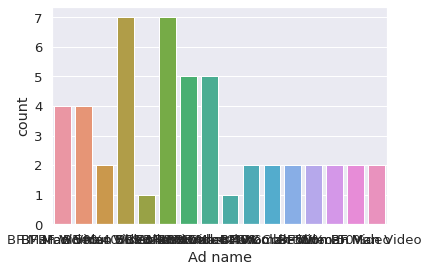

In [ ]:
import seaborn as sns
sns.countplot(x= 'Ad name',data = data)
plt.show()

### Generic View

In [ ]:
# increase figure size
plt.figure(figsize=(22, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad set name', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad set name', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad set name', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad set name', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(x='Ad set name', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad set name', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### Let's Look at a Granular View

In [ ]:
sns.catplot(y='Ad Headline',x='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Results',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Result rate',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad',fontsize=20)

## 2. Effect of Targeting + Ad Format + Budget on Engagement & Conversion

### Generic View

In [ ]:
# increase figure size
plt.figure(figsize=(20, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad Format', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad Format', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad Format', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad Format', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)


# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x='Ad Format', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad Format', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

In [ ]:
sns.catplot(x='Ad Format',y='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Results',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Result rate',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad Format',fontsize=20)

## 3. Effect of Targeting + Frequency + Budget on Engagement & Conversion

In [ ]:
data = data.sort_values(by=['Frequency'])

In [ ]:
data

,Ad set name,Ad name,Campaign name,Result Type,Results,Result rate,Frequency,Amount spent (EUR),CTR (all),Cost per result,"CPM (cost per 1,000 impressions)",Clicks (all),Impressions,CPC
39,US APAC - LAL Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,1.0,0.006025,1.184823,124.16,3.187323,124.160000,7.480870,529,16597,0.234707
31,US APAC - Interests Man,BF Man Video 50%,Private Black Friday 22 Conversions,Website purchases,4.0,0.015262,1.246860,189.19,1.766569,47.297500,7.218513,463,26209,0.408618
49,EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,0.0,0.000000,1.258690,91.26,4.877106,NaN,5.040597,883,18105,0.103352
42,T5 EU - Interests Man,BF Man Video 40%,Private Black Friday 22 Conversions,Website purchases,1.0,0.003288,1.316851,117.57,1.584796,117.570000,3.865654,482,30414,0.243921
47,EU - LAL Woman Catalog,BF Woman Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,1.0,0.005545,1.434378,92.41,4.730217,92.410000,5.124494,853,18033,0.108335
45,T5 EU - LAL Man Catalog,BF Man Video 40% Collection,Private Black Friday 22 Conversions,Website purchases,2.0,0.011822,1.466961,109.03,4.167406,54.515000,6.444996,705,16917,0.154652
9,T5 EU - Interests Man,BF Man 40%,Private Black Friday 22 Conversions,Website purchases,8.0,0.002915,1.467357,747.71,1.822846,93.463750,2.724831,5002,274406,0.149482
5,US APAC - Interests Man,BF Man 50%,Private Black Friday 22 Conversions,Website purchases,13.0,0.005800,1.542176,1372.98,2.777208,105.613846,6.125383,6225,224146,0.220559
20,T5 EU - Interests Woman,BF Woman Video 40%,Private Black Friday 22 Conversions,Website purchases,3.0,0.003960,1.565257,415.32,1.308078,138.440000,5.482049,991,75760,0.419092
15,T5 EU - Interests Woman,BF Woman 40%,Private Black Friday 22 Conversions,Website purchases,1.0,0.000834,1.576880,533.16,1.445188,533.160000,4.448709,1732,119846,0.307829


### Generic View

In [ ]:
# increase figure size
plt.figure(figsize=(20, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Frequency', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Frequency', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Frequency', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Frequency', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x='Frequency', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Frequency', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### Granular View

In [ ]:
sns.catplot(x='Frequency',y='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Results',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Result rate',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Frequency',fontsize=20)